# Separation of Previous Code into Environment and Agent Codes

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent.qLearning(world,'')#'render' with quotes to show environment
agent.work()

## Before Using PyTorch
The neural network model uses array-style inputs and outputs, so I have to change my Q function from it's original form in Q_Learning_Agent to an arrayed form in Q_Learning_Agent_Arrayed.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent_Arrayed

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent_Arrayed.qLearning(world,'')#'render' with quotes to show environment
agent.work()

# Getting Used to PyTorch
The below code seems to work, now making it into a class file. Code from https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

However, upon biasing the output deterministically, we see that the learning algorithm is not stable in its performance. However, the perfomance is stable 

In [ ]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 10, 49, 100, 4

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)*10

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(2000):
    y_pred = model(x)#prediction step is called forward pass
    
    loss = loss_fn(y_pred, y)#loss calculation for feedback
    print(t, loss.item())

    optimizer.zero_grad()
    
    loss.backward()#gradient of loss step is called backward pass
    optimizer.step()
#    with torch.no_grad():# Update the weights using gradient descent.
#        for param in model.parameters():
#            param -= learning_rate * param.grad

### Transfering models between off-policy network and target network

In [ ]:
y_pred
model2 = model
y_pred2 = model2(x)
print(y_pred)
print(y_pred2)

# Implementation of Deep Q-Learning Agent in Gridworld Environment
## Steps for implementation
* Weights initialized 
### Looping
* NN "forward pass" (prediction of Q function) is sent to Agent
* Agent makes decision and observes reward. The reward is sent back to NN along with the currently used Q function
* Send Current Q function estimate for the agent's exploiting policy action (regardless if agent performs action) and newly observed reward to NN class file
* Agent reperforms "forward pass" (prediction of Q function) to facilitate the calculation of loss with respect to the received Q function estimate for agent's exploit action and the observed reward
* Repeat but without weight initialization

## Progress
### Done
* Weights already randomly initialized using above code
### Need to Do
* Forward pass sent to agent
 * Need to include NN in agent's __init__ to enable receiving forward pass output for actions related to agent's state
 * Need to include agent in NN's __init__ to receive state, reward and to receive Q function estimate (y_pred) from agent
#### Progress Notes
Example code, upon which my implementation is based, randomly initizlizes input and output to the network, but not necessarily the weights? From reviewing the tutorial, it seems that the weights are randomly initialized as part of the establishment of a model network. I'll operate on that assumption for now.

done


<IPython.core.display.Javascript object>


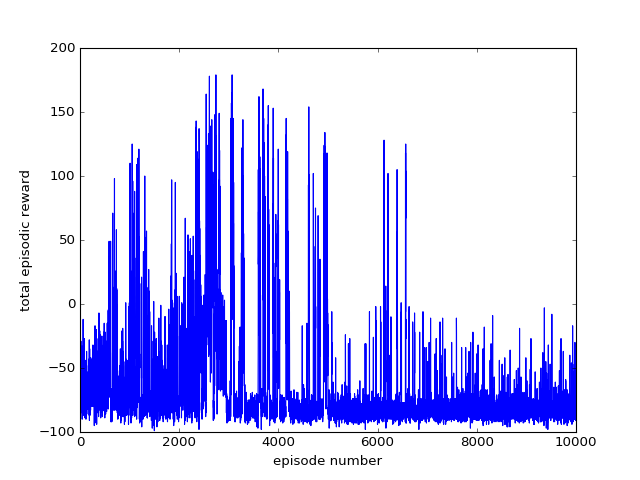

Q function for up action
[[-8.18059063 -7.82635736 -7.93790913 -7.60144567 -7.44273758]
 [-7.42256069 -7.40755844 -7.39179802 -7.70101929 -7.44185686]
 [-7.49063301 -7.71652603 -7.50287628 -7.662745   -7.4941721 ]
 [-8.00675488 -8.02460384 -7.95177555 -7.82932663 -7.78615856]
 [-8.02060795 -8.0379591  -7.97114134 -7.90553236 -7.90569115]]
Q function for down action
[[-8.18398285 -7.83302975 -7.94626617 -7.60164595 -7.4445529 ]
 [-7.42562199 -7.41093397 -7.39548779 -7.70232296 -7.44453382]
 [-7.49153757 -7.71663904 -7.50334835 -7.66144943 -7.49494314]
 [-8.00445938 -8.02170944 -7.94893551 -7.82621384 -7.78389978]
 [-8.01965904 -8.03645039 -7.9696641  -7.90414238 -7.90404844]]
Q function for left action
[[-8.18107605 -7.82303858 -7.93717098 -7.60020733 -7.44188499]
 [-7.42044544 -7.40507698 -7.38895845 -7.69771957 -7.43854284]
 [-7.4910984  -7.71707201 -7.5028019  -7.66241264 -7.49339008]
 [-8.00801277 -8.02574825 -7.95306921 -7.83073282 -7.7873559 ]
 [-8.02101231 -8.03826618 -7.97158909

<IPython.core.display.Javascript object>


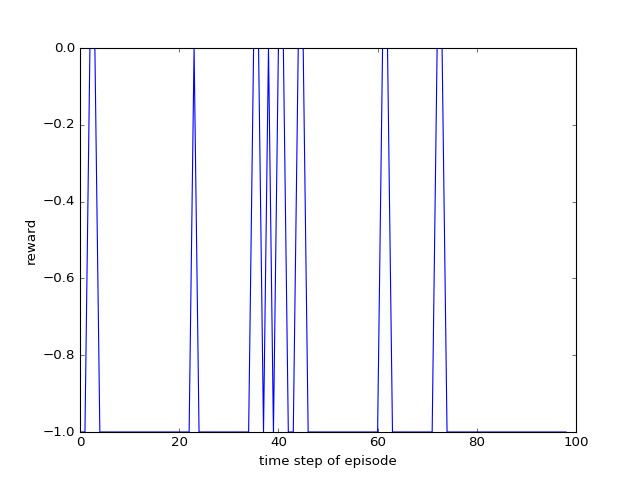

<IPython.core.display.Javascript object>


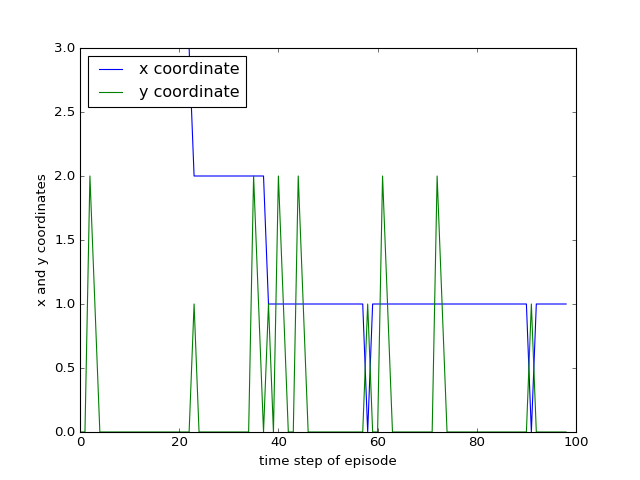

Exploit policy of agent, where: 1 is up, 2 is down, 3 is left and 4 is right
[[1 4 4 4 4]
 [4 4 4 4 4]
 [1 1 3 2 4]
 [2 2 2 2 2]
 [2 2 2 2 2]]


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env_General, Q_Learning_Agent_nn, reluNetworkClass, reluNetworkClass2

world = Gridworld_Env_General.gridworld()
my_nn2 = reluNetworkClass2.qLearningNetwork(world)
my_nn = reluNetworkClass.qLearningNetwork(world,my_nn2)
agent = Q_Learning_Agent_nn.qLearning(world,my_nn,my_nn2,'')#'render' with quotes to show environment
agent.work()